## **Import the required dependencies**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support

## **Read the dataset into the dataframe and display its contents**

In [3]:
fraud_data_df = pd.read_csv('/kaggle/input/fraud-data-6362620/Fraud.csv')

In [13]:
fraud_data_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
fraud_data_df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


## **Exploratory Data Analysis(EDA)**

***Basic information about the dataset***

In [15]:
print('Dataset Information:')
fraud_data_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
fraud_data_df.shape

(6362620, 11)

In [17]:
fraud_data_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

***Summary Statistic for numerical column / 5 point summary***

In [18]:
fraud_data_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [19]:
fraud_data_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

***Class Distribution (fraudulent vs. non-fraudulent)***
0 = non-fraudulent transaction, 1 = fraudulent transaction

In [20]:
fraud_data_df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

***Visualisation of Class Distribution (fraudulent vs. non-fraudulent)***

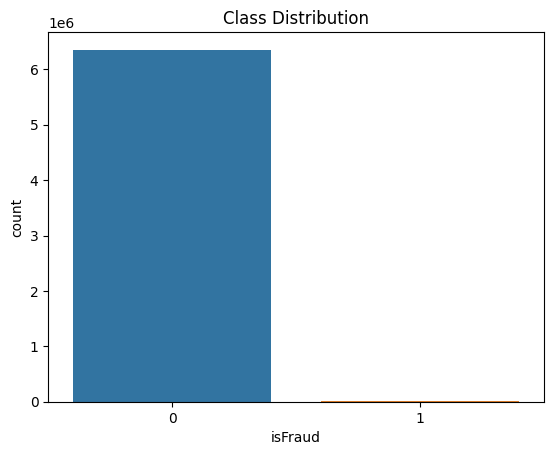

In [21]:
sns.countplot(data=fraud_data_df, x='isFraud')
plt.title('Class Distribution')
plt.show()

##### Observation:This is an highly imbalanced dataset, with majority of the transaction being 'non-fraudulent'. Model trained on this dataset can be highly biased.

***Visualization of Transaction Type vs. Fraud Count***

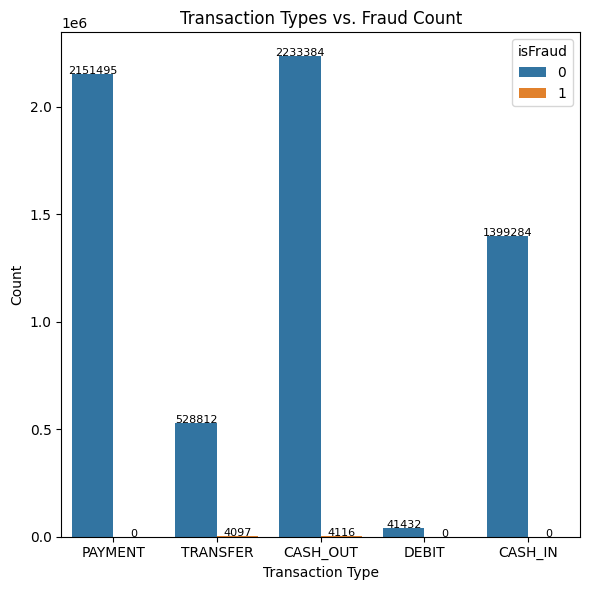

In [22]:
#create countplot
plt.figure(figsize=(6,6))
ax = sns.countplot(x='type', data=fraud_data_df, hue='isFraud')

#Add count values to each transaction type
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=8)

#Add title and labels
plt.title('Transaction Types vs. Fraud Count')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

###### Observation: 'TRANSFER' and 'CASH_OUT' are the only type of transaction that have a chance to be fraudulent

***Visualization of Flagged Transaction Type vs. Fraud Count***

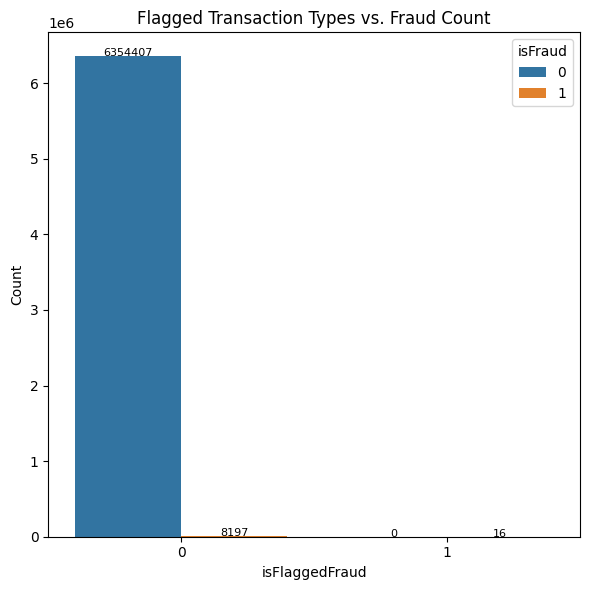

In [23]:
#create a countplot
plt.figure(figsize=(6,6))
ax = sns.countplot(x='isFlaggedFraud', data=fraud_data_df, hue='isFraud')

#Add count values to each transaction type
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=8)

#Add title and labels
plt.title('Flagged Transaction Types vs. Fraud Count')
plt.xlabel('isFlaggedFraud')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

###### Observation: Out of all transactions, only 16 were flagged as fraud, which means the flagged system rarely detects all fraudulent transaction. However, if a transaction is flagged, it is definitively fraudulent.

***Correlation Matrix***

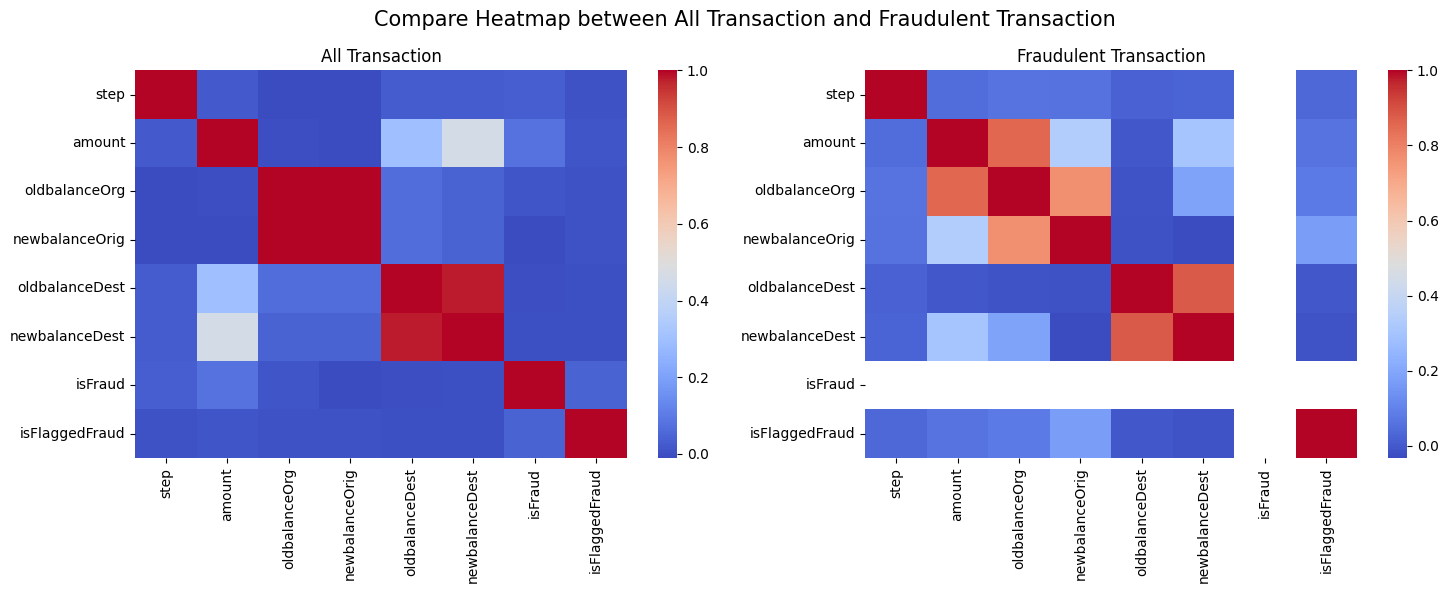

In [24]:
temp = fraud_data_df.select_dtypes(include=['float64', 'int64'])

#Compute the correlation matrix for the dataframe
corr_temp = temp.corr()

#Compute the correlation matrix for Fraudulent transaction dataframe
fraud_trans = temp.loc[fraud_data_df['isFraud'] == 1]
corr_fraud = fraud_trans.corr()

#create subplots
fig, ax = plt.subplots(1,2, figsize=(15,6))

sns.heatmap(corr_temp, annot=False, cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transaction")

sns.heatmap(corr_fraud, annot=False, cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transaction")

fig.suptitle("Compare Heatmap between All Transaction and Fraudulent Transaction", fontsize=15)

plt.tight_layout()
plt.show()

##### Observation: There's a notable correlation between 'amount' and 'oldbalanceOrg' that distinguishes between All Transaction and Fraudulent Transaction. This is typical for fraud because criminals are likely to empty the target's account regardless of the saving balance.

# **Data Preprocessing**

In [4]:
#remove unused columns

fraud_data_df.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [5]:
#convert data types of some columns

fraud_data_df['isFraud'] = fraud_data_df['isFraud'].astype(bool)
fraud_data_df['isFlaggedFraud'] = fraud_data_df['isFlaggedFraud'].astype(bool)
fraud_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         bool   
 7   isFlaggedFraud  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 303.4+ MB


In [6]:
#encoding categorical variable
encoder = OneHotEncoder()
encoder

OneHotEncoder()

In [8]:
#reshape type column to 2d array for Encoder
type_col = fraud_data_df['type'].values.reshape(-1,1)
type_col

array([['PAYMENT'],
       ['PAYMENT'],
       ['TRANSFER'],
       ...,
       ['CASH_OUT'],
       ['TRANSFER'],
       ['CASH_OUT']], dtype=object)

In [9]:
en_type_col = encoder.fit_transform(type_col)
en_type_col

<6362620x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6362620 stored elements in Compressed Sparse Row format>

In [10]:
#reset the index of the dataframe
fraud_data_df = fraud_data_df.reset_index(drop=True)
fraud_data_df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,False,False
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,False,False
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,True,False
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,True,False
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,False,False


In [11]:
#create dataframe from encoded columns
fraud_en_df = pd.DataFrame(en_type_col.toarray(), columns=encoder.get_feature_names_out(['type']))
fraud_en_df.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [12]:
#Drop the original type column and concat with encoded df
enc_data = fraud_data_df.drop(columns=['type'])
enc_data = pd.concat([enc_data, fraud_en_df], axis=1)

enc_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,True,False,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,True,False,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0


## **Stratified split**
After Data Preprocessing, we split the dataset into train and test sets. Given the extreme imbalance in the dataset, Stratified split is a suitable choice for this approach.

In [13]:
#split data into features and target
X = enc_data.drop(columns=['isFraud'])
y = enc_data['isFraud']

In [14]:
#split data into training set and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Training and evaluating model**

In [15]:
#Creating a function that will train, test and evaluate various models.

def run_model_and_eval(model, X_train, y_train, X_test, y_test):

    #Start timer
    start_time = time.time()

    #Train the model
    model.fit(X_train,y_train)

    #Predict on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    #end timer
    end_time = time.time()

    time_taken = end_time - start_time

    #evaluate classifiers performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    precision, recall, f1, support= precision_recall_fscore_support(y_test, y_pred)

    print(f"Running Time: {time_taken:.2f} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))

    print("\nRecall: The model can detect", round(recall[1]*100), "% of fraudulent activites.")
    print("Precision: For every 100 transaction the model predicts as fraudulent, only ", round(precision[1]*100),"are genuinely fraudulent.")
    print("F1 Score: ", f1[1])

    #compute confusion matrix
    cm = confusion_matrix(y_test,y_pred)

    #ROC curve
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

    fig, axes = plt.subplots(1, 2, figsize=(8,4))

    #Confusion matrix visual
    sns.heatmap(cm, xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"], ax=axes[0], annot=True, cmap='Blues', cbar=False, fmt='g')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    axes[0].set_title('Confusion Matrix')

    #ROC Curve visual
    axes[1].plot(fpr, tpr, color='Blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid(alpha=0.2)

    plt.tight_layout()
    plt.show()


**Models Trained on Imbalanced(Original) Dataset:**
1.   Logistic Regression
2.   Stochastic Gradient Descent Classifier
3.   Naive Bayes Classifier
4.   Decision Tree Classifier
5.   Random Forest Classifier
6.   K-Neighbors Classifier
7.   XGBoost









***Logistic Regression***

Running Time: 28.05 seconds
Accuracy: 0.9979481722938035
ROC AUC: 0.9642350736950476
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.36      0.79      0.50      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.89      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 79 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  36 are genuinely fraudulent.
F1 Score:  0.49720777970344693


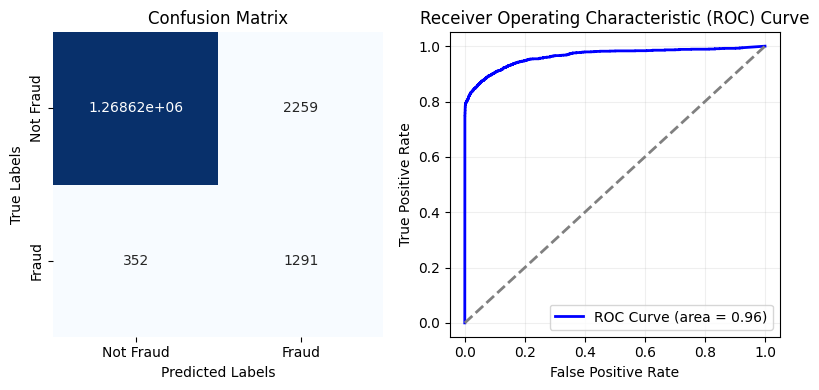

In [36]:
lrc = LogisticRegression()
lr = run_model_and_eval(lrc, X_train, y_train, X_test, y_test)

***Decision Tree***

Running Time: 30.84 seconds
Accuracy: 0.9996424428930221
ROC AUC: 0.9952053834334024
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.75      0.84      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 75 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  96 are genuinely fraudulent.
F1 Score:  0.8449744463373083


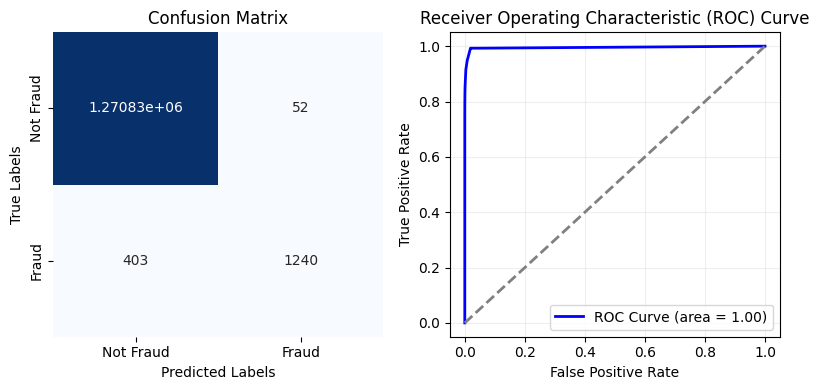

In [37]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt = run_model_and_eval(dtc, X_train, y_train, X_test, y_test)

***Random Forest***

Running Time: 99.80 seconds
Accuracy: 0.9996809490430043
ROC AUC: 0.97098428491875
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.79      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 79 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  96 are genuinely fraudulent.
F1 Score:  0.8641231593038822


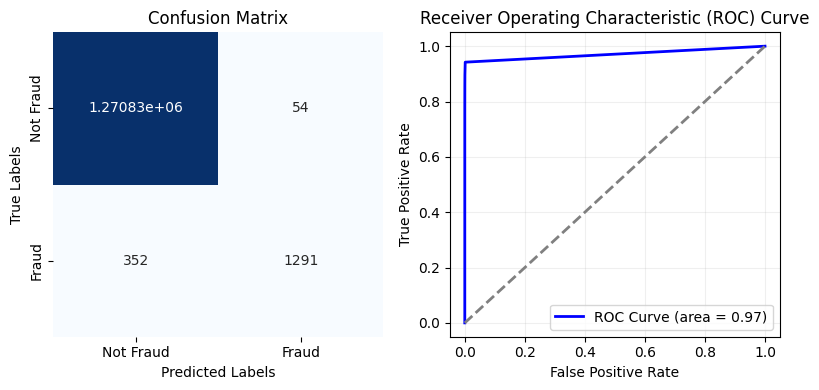

In [38]:
rfc = RandomForestClassifier(random_state=42, n_estimators=10)
rf = run_model_and_eval(rfc, X_train, y_train, X_test, y_test)

***Naive Bayes***

Running Time: 2.40 seconds
Accuracy: 0.9929470878348856
ROC AUC: 0.7977666817422575
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.03      0.16      0.06      1643

    accuracy                           0.99   1272524
   macro avg       0.52      0.58      0.53   1272524
weighted avg       1.00      0.99      1.00   1272524


Recall: The model can detect 16 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  3 are genuinely fraudulent.
F1 Score:  0.05615732463981492


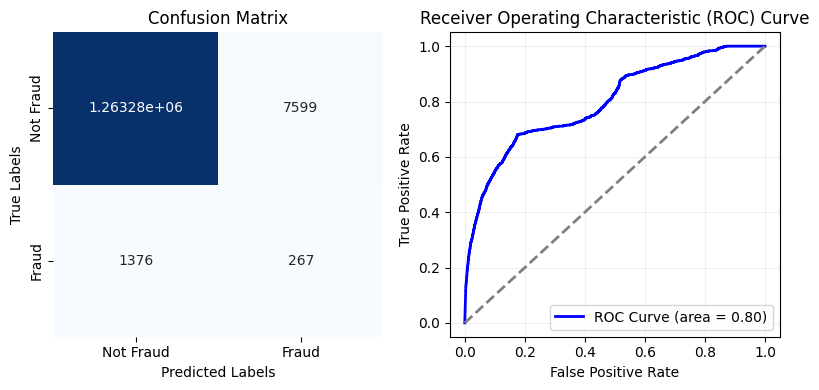

In [39]:
gnb = GaussianNB()
nb = run_model_and_eval(gnb, X_train, y_train, X_test, y_test)

***SGDC***

Running Time: 58.63 seconds
Accuracy: 0.9886886219827681
ROC AUC: 0.8511869416767394
              precision    recall  f1-score   support

       False       1.00      0.99      0.99   1270881
        True       0.08      0.71      0.14      1643

    accuracy                           0.99   1272524
   macro avg       0.54      0.85      0.57   1272524
weighted avg       1.00      0.99      0.99   1272524


Recall: The model can detect 71 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  8 are genuinely fraudulent.
F1 Score:  0.1400406261202055


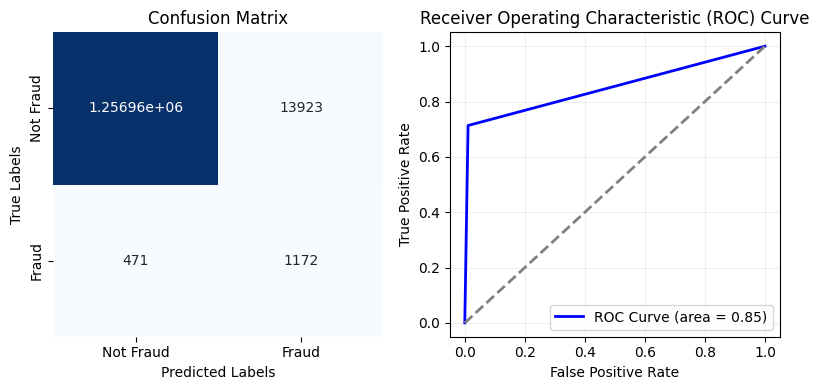

In [40]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
SGD = run_model_and_eval(sgd, X_train, y_train, X_test, y_test)

***K-Neighbors***

Running Time: 564.17 seconds
Accuracy: 0.9994538413420886
ROC AUC: 0.9463049301023482
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.91      0.64      0.75      1643

    accuracy                           1.00   1272524
   macro avg       0.95      0.82      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 64 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  91 are genuinely fraudulent.
F1 Score:  0.7525809896760413


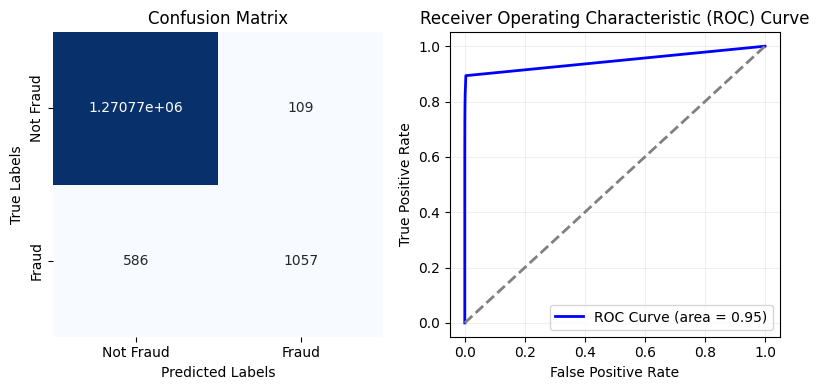

In [41]:
knn = KNeighborsClassifier(n_neighbors = 15)
KNN = run_model_and_eval(knn, X_train, y_train, X_test, y_test)

***XGBoost***

Running Time: 196.70 seconds
Accuracy: 0.9997100251154398
ROC AUC: 0.999697279885661
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.81      0.88      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.91      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 81 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  96 are genuinely fraudulent.
F1 Score:  0.8784184514003296


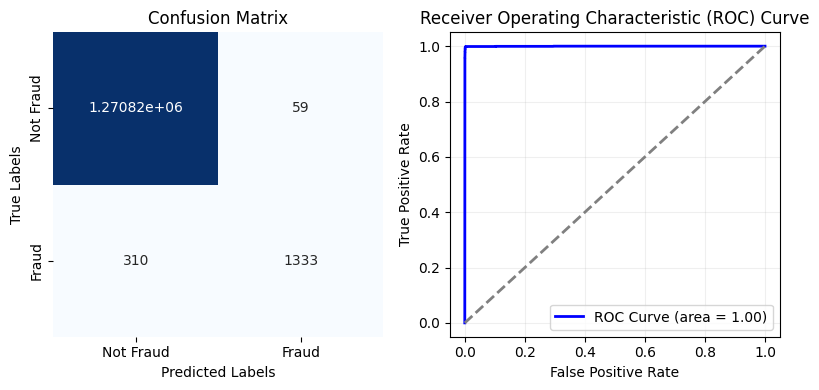

In [42]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb = run_model_and_eval(model, X_train, y_train, X_test, y_test)

# **Undersampling the majority class**

In [18]:
rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

resampled_df = pd.concat([X_resampled, y_resampled], axis=1)

Running Time: 0.47 seconds
Accuracy: 0.8665282540840095
ROC AUC: 0.9821603867214991
              precision    recall  f1-score   support

       False       1.00      0.87      0.93   1270881
        True       0.01      0.97      0.02      1643

    accuracy                           0.87   1272524
   macro avg       0.50      0.92      0.47   1272524
weighted avg       1.00      0.87      0.93   1272524


Recall: The model can detect 97 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  1 are genuinely fraudulent.
F1 Score:  0.018458159963014333


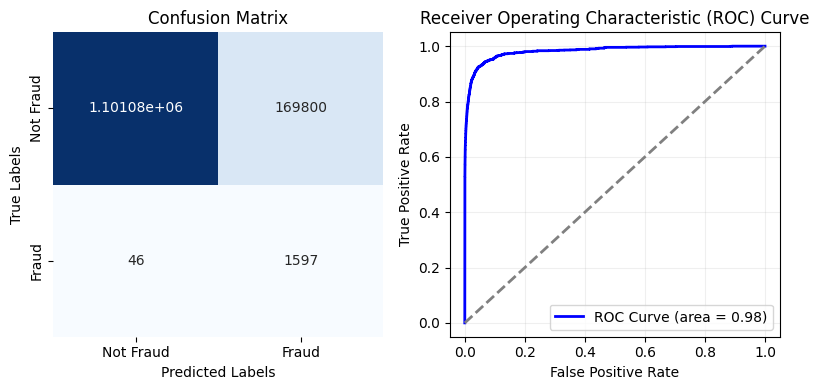

In [44]:
lr = run_model_and_eval(LogisticRegression(), X_resampled, y_resampled, X_test, y_test)

Running Time: 2.33 seconds
Accuracy: 0.9923844265412676
ROC AUC: 0.9993050028498665
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.14      1.00      0.25      1643

    accuracy                           0.99   1272524
   macro avg       0.57      1.00      0.62   1272524
weighted avg       1.00      0.99      1.00   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  14 are genuinely fraudulent.
F1 Score:  0.2529869729438064


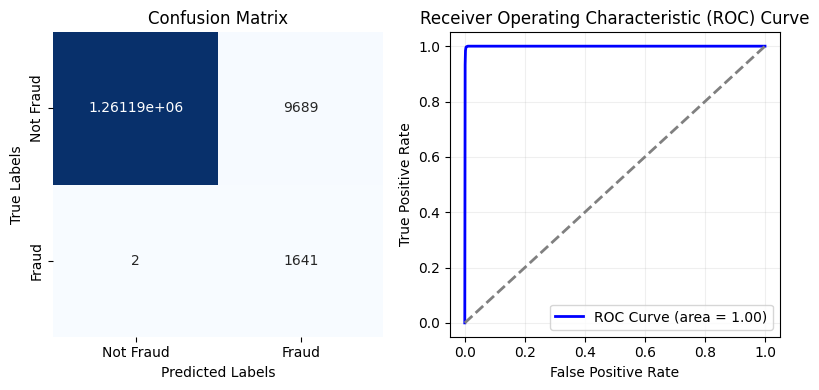

In [45]:
rfc = RandomForestClassifier(random_state=42, n_estimators=10)
rf = run_model_and_eval(rfc, X_resampled, y_resampled, X_test, y_test)

Running Time: 0.35 seconds
Accuracy: 0.992510946748352
ROC AUC: 0.9981557083407172
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.15      1.00      0.26      1643

    accuracy                           0.99   1272524
   macro avg       0.57      1.00      0.63   1272524
weighted avg       1.00      0.99      1.00   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  15 are genuinely fraudulent.
F1 Score:  0.25628219135320746


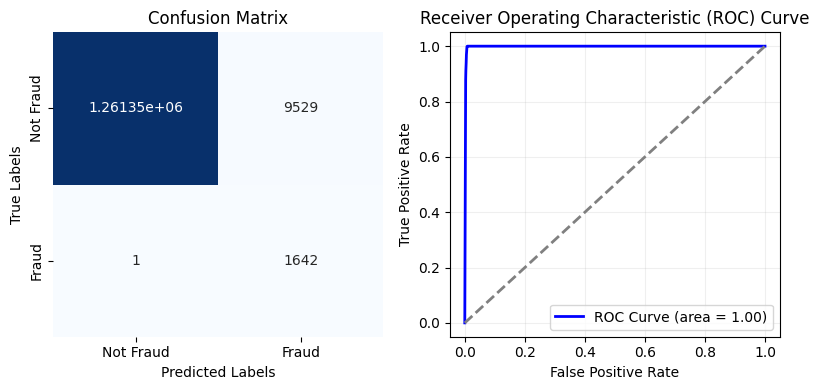

In [46]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt = run_model_and_eval(dtc, X_resampled, y_resampled, X_test, y_test)

Running Time: 0.72 seconds
Accuracy: 0.9857260059535223
ROC AUC: 0.8053998686299577
              precision    recall  f1-score   support

       False       1.00      0.99      0.99   1270881
        True       0.03      0.27      0.05      1643

    accuracy                           0.99   1272524
   macro avg       0.51      0.63      0.52   1272524
weighted avg       1.00      0.99      0.99   1272524


Recall: The model can detect 27 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  3 are genuinely fraudulent.
F1 Score:  0.046308936259582066


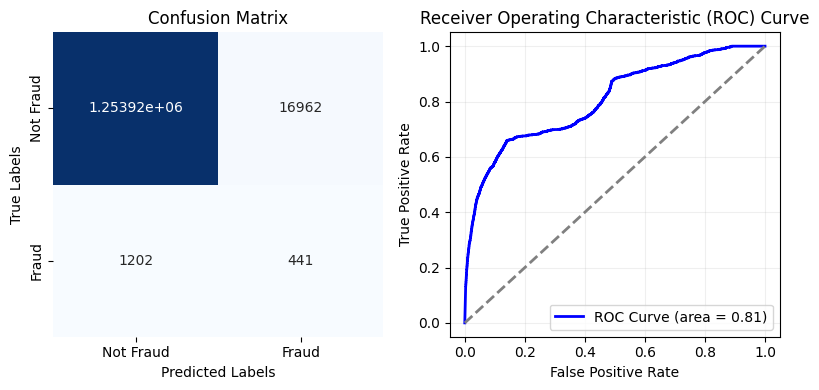

In [47]:
gnb = GaussianNB()
nb = run_model_and_eval(gnb, X_resampled, y_resampled, X_test, y_test)

Running Time: 0.33 seconds
Accuracy: 0.8604513549449755
ROC AUC: 0.9112919409508421
              precision    recall  f1-score   support

       False       1.00      0.86      0.92   1270881
        True       0.01      0.96      0.02      1643

    accuracy                           0.86   1272524
   macro avg       0.50      0.91      0.47   1272524
weighted avg       1.00      0.86      0.92   1272524


Recall: The model can detect 96 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  1 are genuinely fraudulent.
F1 Score:  0.017494647036366957


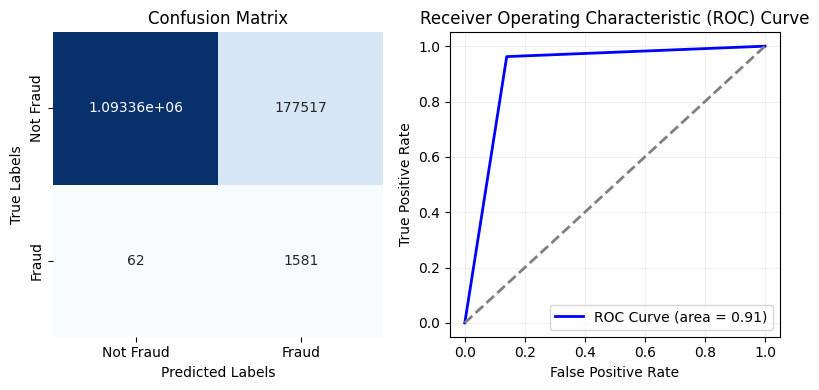

In [48]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
SGD = run_model_and_eval(sgd, X_resampled, y_resampled, X_test, y_test)

Running Time: 118.71 seconds
Accuracy: 0.9673302821793538
ROC AUC: 0.9933420029797139
              precision    recall  f1-score   support

       False       1.00      0.97      0.98   1270881
        True       0.04      0.95      0.07      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.96      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524


Recall: The model can detect 95 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  4 are genuinely fraudulent.
F1 Score:  0.0695181181315607


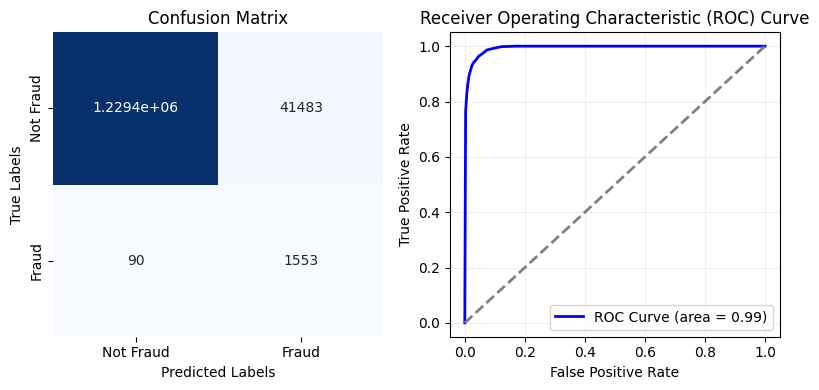

In [49]:
knn = KNeighborsClassifier(n_neighbors = 15)
KNN = run_model_and_eval(knn, X_resampled, y_resampled, X_test, y_test)

Running Time: 7.44 seconds
Accuracy: 0.9943262366760862
ROC AUC: 0.9997876535949752
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.19      1.00      0.31      1643

    accuracy                           0.99   1272524
   macro avg       0.59      1.00      0.65   1272524
weighted avg       1.00      0.99      1.00   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  19 are genuinely fraudulent.
F1 Score:  0.31264280274181266


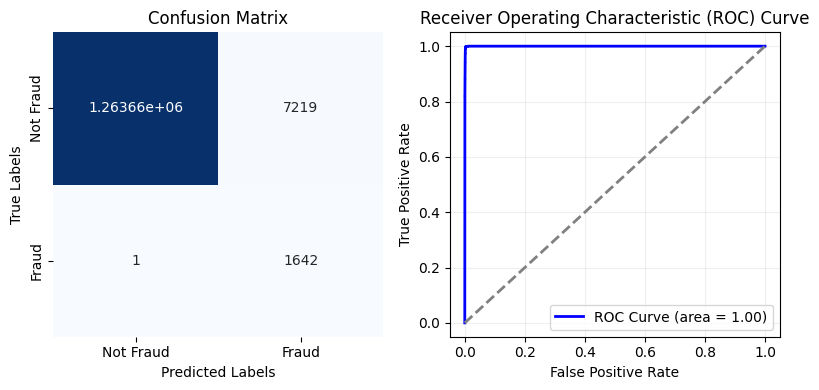

In [50]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb = run_model_and_eval(model, X_resampled, y_resampled, X_test, y_test)

# **Applying SMOTE on the dataframe.**

In [16]:
smote = SMOTE(random_state=42)
smoted_X_train, smoted_y_train = smote.fit_resample(X_train, y_train)

smote_df = pd.concat([smoted_X_train, smoted_y_train], axis=1)
smote_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
0,9914.74,44248.00,34333.26,0.00,0.00,False,0.0,0.0,0.0,1.0,0.0,False
1,6854.53,0.00,0.00,0.00,0.00,False,0.0,0.0,0.0,1.0,0.0,False
2,361211.80,0.00,0.00,489745.16,850956.95,False,0.0,1.0,0.0,0.0,0.0,False
3,7083.51,0.00,0.00,0.00,0.00,False,0.0,0.0,0.0,1.0,0.0,False
4,218019.51,13045685.58,13263705.09,2438123.98,2220104.47,False,1.0,0.0,0.0,0.0,0.0,False


Running Time: 35.25 seconds
Accuracy: 0.6851069213625833
ROC AUC: 0.977473233671508
              precision    recall  f1-score   support

       False       1.00      0.68      0.81   1270881
        True       0.00      0.98      0.01      1643

    accuracy                           0.69   1272524
   macro avg       0.50      0.83      0.41   1272524
weighted avg       1.00      0.69      0.81   1272524


Recall: The model can detect 98 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  0 are genuinely fraudulent.
F1 Score:  0.007976609866536612


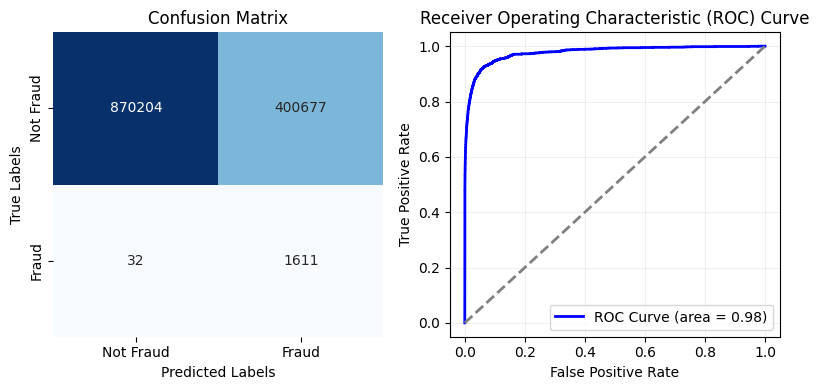

In [52]:
lr = run_model_and_eval(LogisticRegression(), smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 246.30 seconds
Accuracy: 0.9992675973105419
ROC AUC: 0.9971066194062245
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.65      0.96      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 96 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  65 are genuinely fraudulent.
F1 Score:  0.7721271393643032


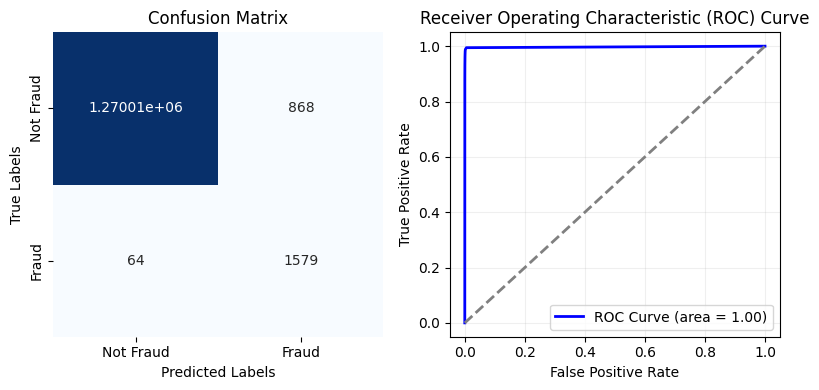

In [53]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rf = run_model_and_eval(model, smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 83.70 seconds
Accuracy: 0.9916339495365117
ROC AUC: 0.9986150994292334
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.13      1.00      0.23      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.99      0.62   1272524
weighted avg       1.00      0.99      0.99   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  13 are genuinely fraudulent.
F1 Score:  0.23498131647025008


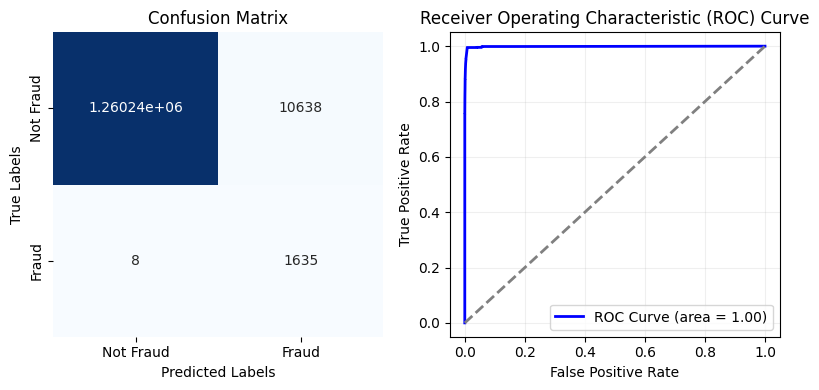

In [54]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10)
df = run_model_and_eval(model, smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 4.10 seconds
Accuracy: 0.9823311780367208
ROC AUC: 0.808290626930025
              precision    recall  f1-score   support

       False       1.00      0.98      0.99   1270881
        True       0.02      0.32      0.04      1643

    accuracy                           0.98   1272524
   macro avg       0.51      0.65      0.52   1272524
weighted avg       1.00      0.98      0.99   1272524


Recall: The model can detect 32 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  2 are genuinely fraudulent.
F1 Score:  0.044453888652783685


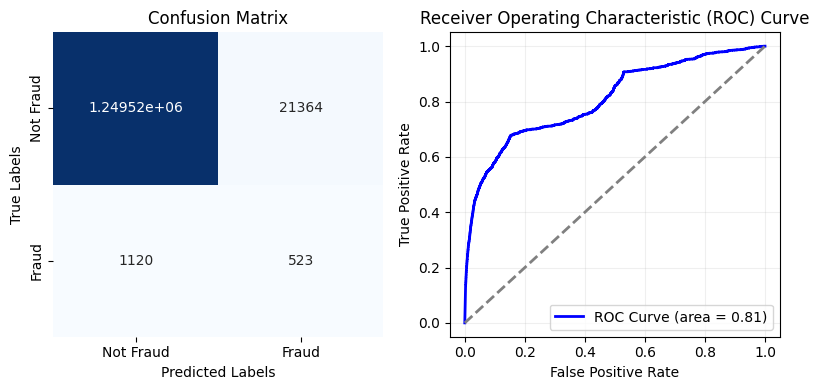

In [55]:
nb = GaussianNB()
rf = run_model_and_eval(nb, smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 373.93 seconds
Accuracy: 0.6700698768746208
ROC AUC: 0.8205370579829003
              precision    recall  f1-score   support

       False       1.00      0.67      0.80   1270881
        True       0.00      0.97      0.01      1643

    accuracy                           0.67   1272524
   macro avg       0.50      0.82      0.40   1272524
weighted avg       1.00      0.67      0.80   1272524


Recall: The model can detect 97 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  0 are genuinely fraudulent.
F1 Score:  0.007545457124216379


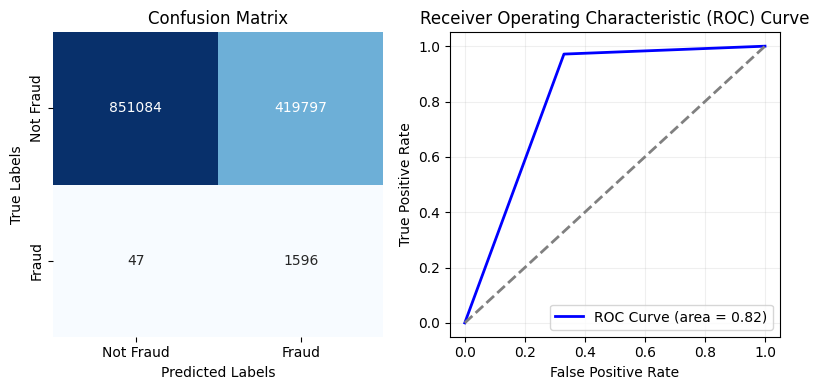

In [56]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
SGD = run_model_and_eval(sgd, smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 368.90 seconds
Accuracy: 0.9926799023043966
ROC AUC: 0.9733798154732123
              precision    recall  f1-score   support

       False       1.00      0.99      1.00   1270881
        True       0.14      0.94      0.25      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.97      0.62   1272524
weighted avg       1.00      0.99      1.00   1272524


Recall: The model can detect 94 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  14 are genuinely fraudulent.
F1 Score:  0.24909310761789602


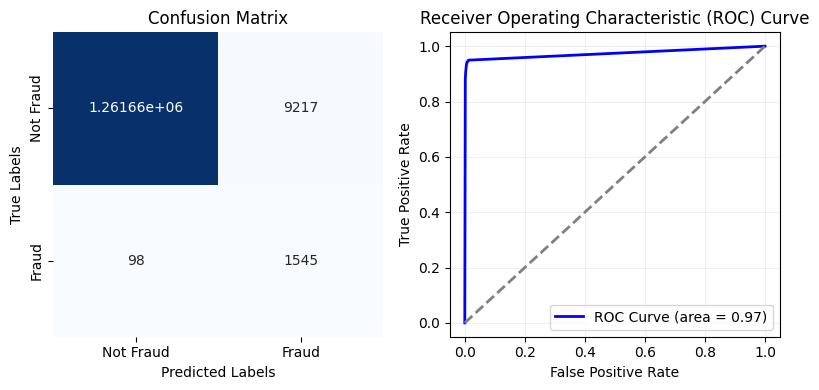

In [57]:
knn = KNeighborsClassifier(n_neighbors = 15)
KNN = run_model_and_eval(knn, smoted_X_train, smoted_y_train, X_test, y_test)

Running Time: 425.21 seconds
Accuracy: 0.9983002285222126
ROC AUC: 0.9996480432143352
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.43      1.00      0.60      1643

    accuracy                           1.00   1272524
   macro avg       0.72      1.00      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  43 are genuinely fraudulent.
F1 Score:  0.6020239190432383


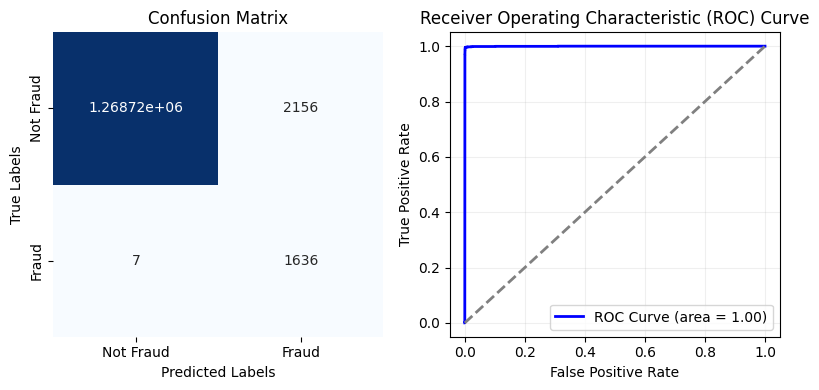

In [58]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb = run_model_and_eval(model, smoted_X_train, smoted_y_train, X_test, y_test)

# **Hyperparameter tuning of Models**

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create a Logistic Regression model
model = LogisticRegression()

# Define the hyperparameter distributions
param_dist = {
    'C': uniform(loc=0, scale=4),  # Range of C values to sample from
    'penalty': ['l1', 'l2'],      # Regularization penalty types
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)


{'C': 1.8802971285811112, 'penalty': 'l2'}


Running Time: 35.56 seconds
Accuracy: 0.6851069213625833
ROC AUC: 0.977473233671508
              precision    recall  f1-score   support

       False       1.00      0.68      0.81   1270881
        True       0.00      0.98      0.01      1643

    accuracy                           0.69   1272524
   macro avg       0.50      0.83      0.41   1272524
weighted avg       1.00      0.69      0.81   1272524


Recall: The model can detect 98 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  0 are genuinely fraudulent.
F1 Score:  0.007976609866536612


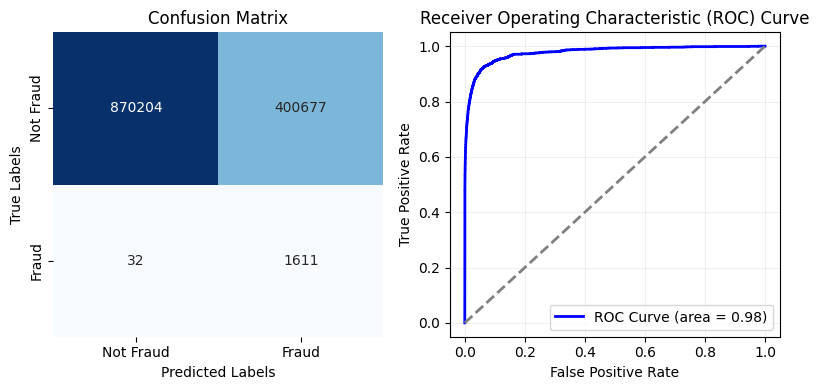

In [19]:
#Hyperparameter Tuned
lr = LogisticRegression(C=1.8, penalty='l2')
lrc = run_model_and_eval(lr, smoted_X_train, smoted_y_train, X_test, y_test)

In [20]:
from scipy.stats import randint

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Define the hyperparameter distributions
param_dist = {
    'max_depth': [None] + list(randint(2, 20).rvs(100)),  # Vary the maximum depth
    'min_samples_split': randint(2, 20),                 # Vary the minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),                  # Vary the minimum samples required to be a leaf node
    'criterion': ['gini', 'entropy']                    # Split criterion
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)


{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 4}


Running Time: 91.26 seconds
Accuracy: 0.9963340573537316
ROC AUC: 0.9976340009601162
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.26      1.00      0.41      1643

    accuracy                           1.00   1272524
   macro avg       0.63      1.00      0.71   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 100 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  26 are genuinely fraudulent.
F1 Score:  0.41209829867674863


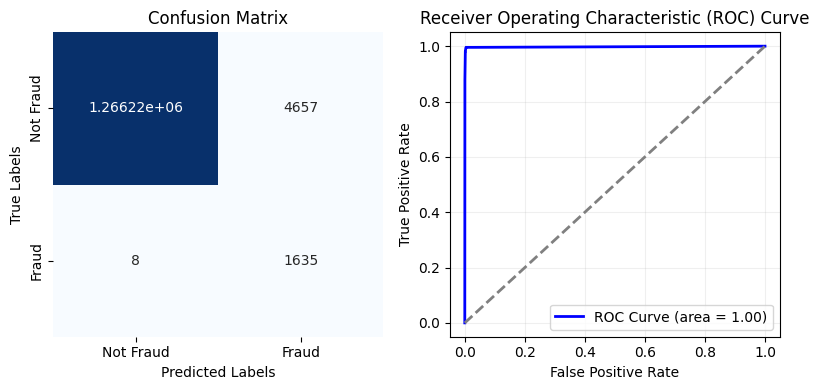

In [21]:
#Hyperarameter Tuned
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_leaf=3, min_samples_split=4)
dt = run_model_and_eval(dtc, smoted_X_train, smoted_y_train, X_test, y_test)

In [21]:
# Create a Random Forest model
model = RandomForestClassifier()

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 500),               # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],     # Maximum number of features to consider for the best split
    'max_depth': [None] + list(randint(2, 20).rvs(100)),  # Vary the maximum depth
    'min_samples_split': randint(2, 20),         # Vary the minimum samples required to split an internal node
    'min_samples_leaf': randint(1, 20),          # Vary the minimum samples required to be a leaf node
    'bootstrap': [True, False]                   # Whether to use bootstrap samples when building trees
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)

{'bootstrap': False, 'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 382}


Running Time: 12634.88 seconds
Accuracy: 0.9976699850061767
ROC AUC: 0.99956184419852
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.35      0.98      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.99      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 98 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  35 are genuinely fraudulent.
F1 Score:  0.5218513143041444


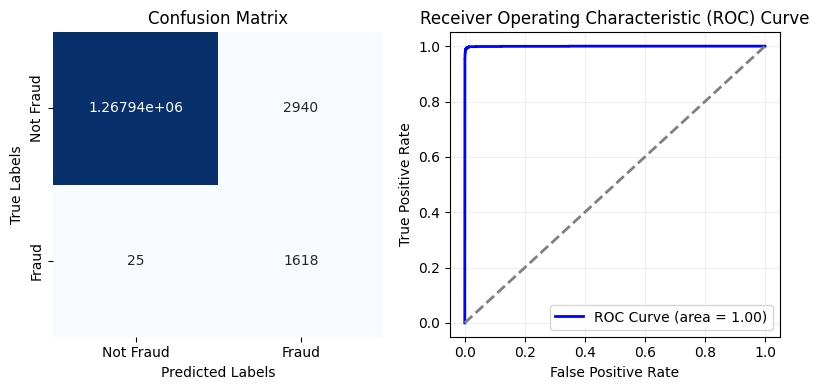

In [23]:
#hyperparameter tuned
rfc=RandomForestClassifier(bootstrap=False, max_depth=19, max_features='auto', min_samples_leaf=3, min_samples_split=2, n_estimators=382)
rf = run_model_and_eval(rfc, smoted_X_train, smoted_y_train, X_test, y_test)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create an SGDClassifier model
model = SGDClassifier()

# Define the hyperparameter distributions
param_dist = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],  # Loss function
    'alpha': uniform(loc=1e-6, scale=1e-5),                      # L2 regularization term
    'penalty': ['l2', 'l1', 'elasticnet'],                       # Regularization type
    'max_iter': [1000, 2000, 3000, 4000],                       # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5],                                  # Tolerance for stopping criterion
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)

{'alpha': 5.2277710148191e-06, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001}


Running Time: 349.73 seconds
Accuracy: 0.6760414734810503
ROC AUC: 0.8171442296926459
              precision    recall  f1-score   support

       False       1.00      0.68      0.81   1270881
        True       0.00      0.96      0.01      1643

    accuracy                           0.68   1272524
   macro avg       0.50      0.82      0.41   1272524
weighted avg       1.00      0.68      0.81   1272524


Recall: The model can detect 96 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  0 are genuinely fraudulent.
F1 Score:  0.007583143754739465


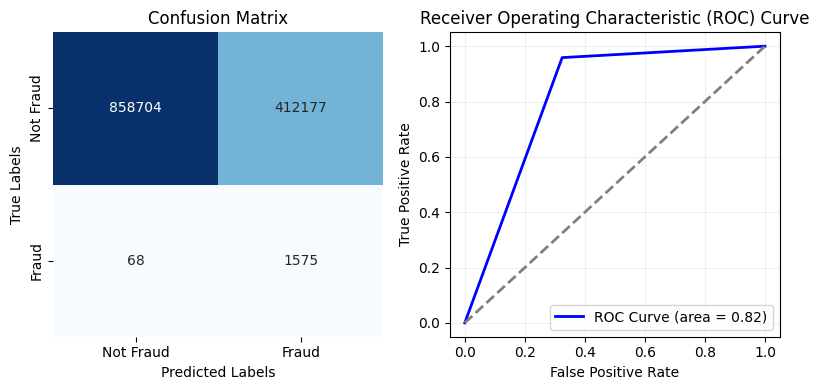

In [22]:
#Hyperparameter Tuned
sgd = SGDClassifier(alpha=0.000005, loss='modified_huber', max_iter=1000, penalty='l1', tol=0.0001)
sgdc = run_model_and_eval(sgd, smoted_X_train, smoted_y_train, X_test, y_test)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create a KNeighborsClassifier model
model = KNeighborsClassifier()

# Define the hyperparameter distributions
param_dist = {
    'n_neighbors': randint(1, 20),      # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],                         # Power parameter for the Minkowski metric
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)


{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


Running Time: 245.63 seconds
Accuracy: 0.9964204997312428
ROC AUC: 0.9576179491127544
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.25      0.91      0.40      1643

    accuracy                           1.00   1272524
   macro avg       0.63      0.95      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 91 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  25 are genuinely fraudulent.
F1 Score:  0.3950059768893611


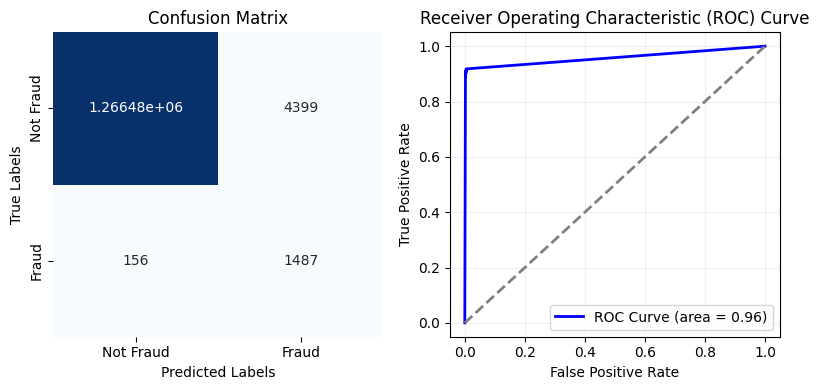

In [19]:
#Hyparameter Tuned
kn = KNeighborsClassifier(n_neighbors=3, p=2, weights='distance')
knc = run_model_and_eval(kn, smoted_X_train, smoted_y_train, X_test, y_test)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Define the hyperparameter distributions
param_dist = {
    'var_smoothing': uniform(1e-9, 1e-6)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)


{'var_smoothing': 9.637838253036046e-08}


Running Time: 4.32 seconds
Accuracy: 0.9823311780367208
ROC AUC: 0.8079329614892599
              precision    recall  f1-score   support

       False       1.00      0.98      0.99   1270881
        True       0.02      0.32      0.04      1643

    accuracy                           0.98   1272524
   macro avg       0.51      0.65      0.52   1272524
weighted avg       1.00      0.98      0.99   1272524


Recall: The model can detect 32 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  2 are genuinely fraudulent.
F1 Score:  0.044453888652783685


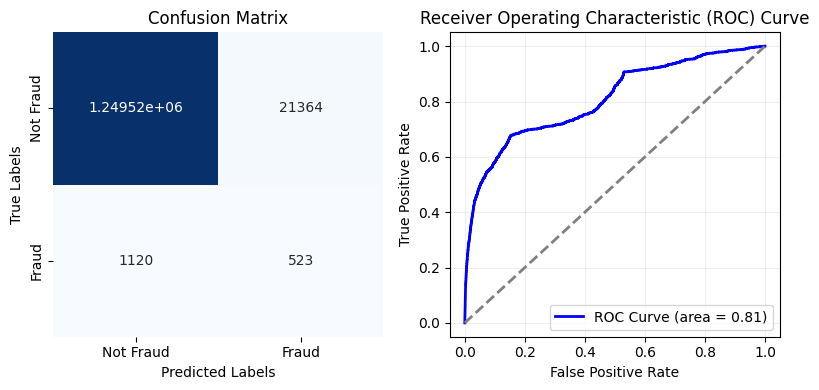

In [17]:
#Hyparameter Tuned
nb = GaussianNB(var_smoothing=9.6e-08)
nbc = run_model_and_eval(nb, smoted_X_train, smoted_y_train, X_test, y_test)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Create an XGBoost classifier
model = XGBClassifier()

# Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model on the training data
random_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print(best_params)


{'colsample_bytree': 0.9208439450038796, 'learning_rate': 0.11744692200866175, 'max_depth': 9, 'n_estimators': 109, 'subsample': 0.8719299676904873}


Running Time: 498.71 seconds
Accuracy: 0.9987465855260883
ROC AUC: 0.9994818729806013
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.51      0.99      0.67      1643

    accuracy                           1.00   1272524
   macro avg       0.75      1.00      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524


Recall: The model can detect 99 % of fraudulent activites.
Precision: For every 100 transaction the model predicts as fraudulent, only  51 are genuinely fraudulent.
F1 Score:  0.6717431570281952


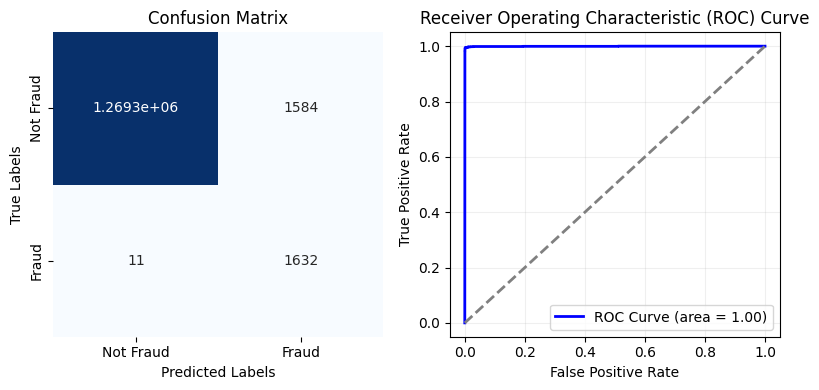

In [18]:
#Hyperparameter Tuned
xgb = XGBClassifier(colsample_bytree=0.9, learning_rate=0.18, max_depth=9, n_estimators=109, subsample=0.87)
xgbc = run_model_and_eval(xgb, smoted_X_train, smoted_y_train, X_test, y_test)